In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'nox.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,day_type,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,working_day_0,27,40,30,25,24,20,40,81,99,...,49,49,63,49,83,103,70,56,64,49
1,working_day_1,61,68,60,52,48,68,93,167,141,...,44,30,21,25,29,33,34,44,63,84
2,working_day_2,70,44,73,79,71,88,104,149,190,...,31,35,28,34,29,31,27,28,102,136
3,non_working_day_3,167,96,94,103,91,62,50,90,123,...,24,28,34,39,73,66,76,103,122,129
4,non_working_day_4,95,67,57,68,54,30,28,34,31,...,17,12,12,12,15,18,15,13,22,21


In [16]:
# Define a custom function for encoding 'day_type'
def encode_day_type(day_type):
    if 'non_working_day_' in day_type:
        return 0
    elif 'working_day_' in day_type:
        return 1
    else:
        print(f"Unexpected value: {day_type}")
        return -1  # For unexpected values

# Apply the custom encoding function
data['encoded_day_type'] = data['day_type'].apply(encode_day_type)

# Split the data into features (X) and encoded labels (y)
X = data.drop(columns=['day_type', 'encoded_day_type'])
y = data['encoded_day_type']


In [20]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a logistic regression model
logreg_baseline = LogisticRegression(max_iter=1000)
logreg_baseline.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = logreg_baseline.predict(X_test)

# Calculate accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Accuracy: {baseline_accuracy}')


Baseline Accuracy: 0.9130434782608695


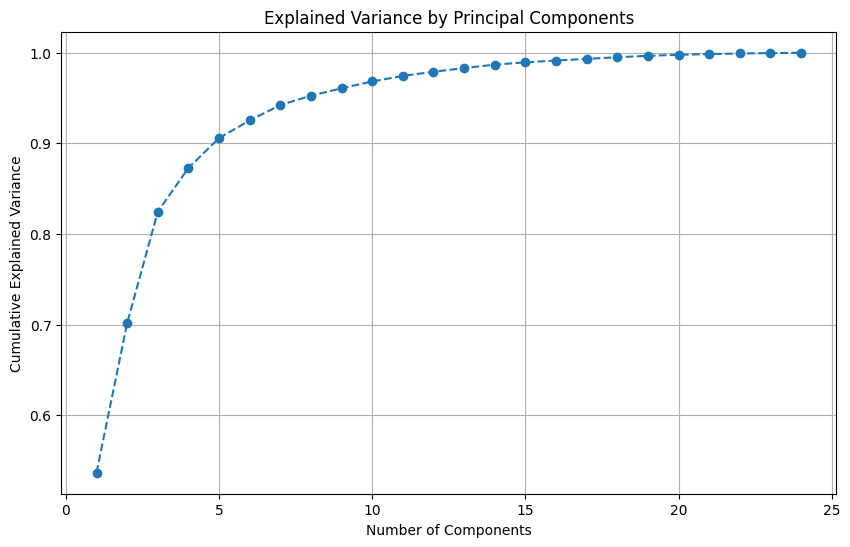

Reduced Accuracy with PCA: 1.0


In [22]:
# Apply PCA to the feature set
pca = PCA(n_components=24)
X_pca = pca.fit_transform(X)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Select number of components (e.g., 5 components)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the reduced data into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression on reduced data
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Calculate accuracy
pca_accuracy = accuracy_score(y_test, y_pred_pca)
print(f'Reduced Accuracy with PCA: {pca_accuracy}')


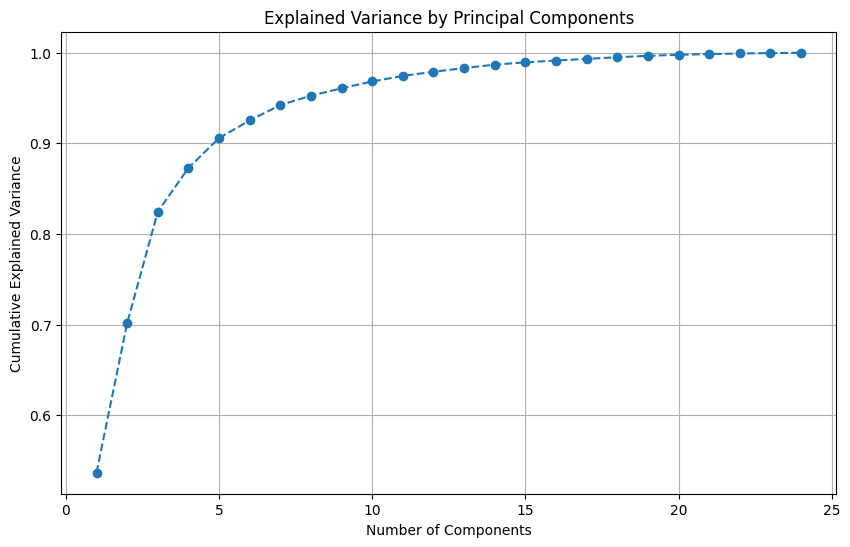

Reduced Accuracy with PCA: 1.0


In [8]:
# Apply PCA to the feature set
pca = PCA(n_components=24)
X_reduced = pca.fit_transform(X)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)

logistic_regression_reduced = LogisticRegression(max_iter=1000)
logistic_regression_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = logistic_regression_reduced.predict(X_test_reduced)

reduced_accuracy = accuracy_score(y_test, y_pred_reduced)
print(f'Reduced Accuracy with PCA: {reduced_accuracy}')

Augmented Accuracy with PCA-generated data: 0.9692307692307692


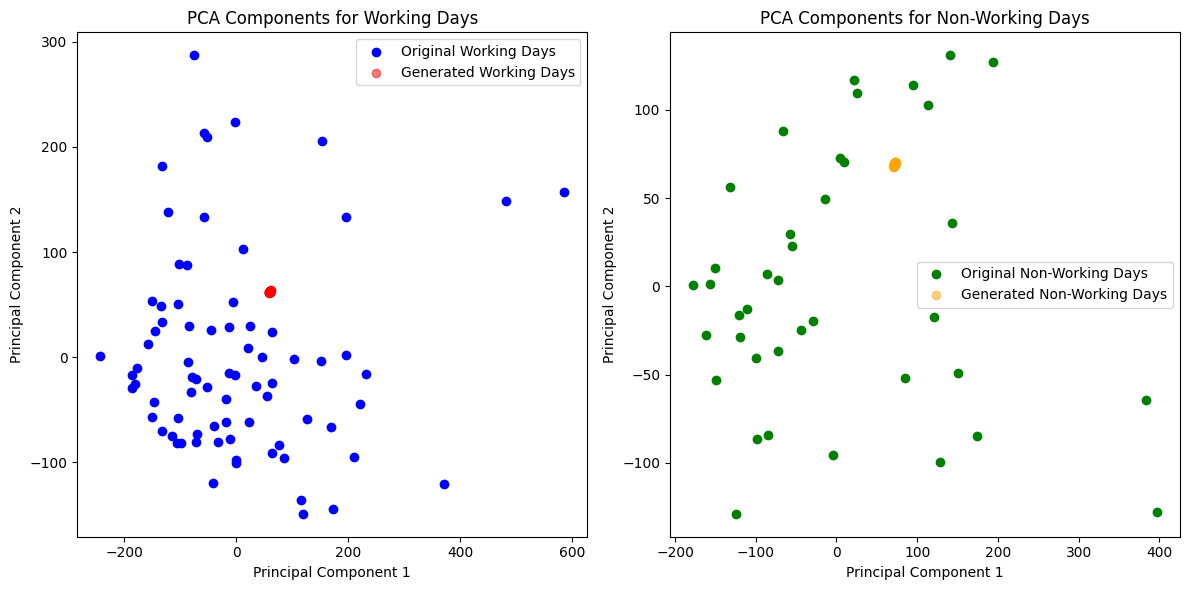

In [24]:
# Separate the data by class
X_working_day = X[y == 1]
X_non_working_day = X[y == 0]

# Apply PCA to each class separately
pca_working = PCA(n_components=5)
X_working_reduced = pca_working.fit_transform(X_working_day)
X_working_reconstructed = pca_working.inverse_transform(X_working_reduced)

pca_non_working = PCA(n_components=5)
X_non_working_reduced = pca_non_working.fit_transform(X_non_working_day)
X_non_working_reconstructed = pca_non_working.inverse_transform(X_non_working_reduced)

# Generate new data
num_samples = 50  # Number of new samples to generate per class
new_working_data = pca_working.inverse_transform(np.random.randn(num_samples, 5))
new_non_working_data = pca_non_working.inverse_transform(np.random.randn(num_samples, 5))

# Combine the new data with the original data
X_augmented = np.vstack([X, new_working_data, new_non_working_data])
y_augmented = np.hstack([y, np.ones(num_samples), np.zeros(num_samples)])

# Split the augmented data into training and test sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_augmented, y_augmented, test_size=0.3, random_state=42, stratify=y_augmented)

# Train a logistic regression model on the augmented data
logistic_regression_augmented = LogisticRegression(max_iter=1000)
logistic_regression_augmented.fit(X_train_aug, y_train_aug)

# Predict on the test set
y_pred_augmented = logistic_regression_augmented.predict(X_test_aug)

# Calculate accuracy
augmented_accuracy = accuracy_score(y_test_aug, y_pred_augmented)
print(f'Augmented Accuracy with PCA-generated data: {augmented_accuracy}')

# Visualize the data or performance if needed
# Plot PCA components for working days
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_working_reduced[:, 0], X_working_reduced[:, 1], color='blue', label='Original Working Days')
plt.scatter(new_working_data[:, 0], new_working_data[:, 1], color='red', label='Generated Working Days', alpha=0.5)
plt.title('PCA Components for Working Days')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot PCA components for non-working days
plt.subplot(1, 2, 2)
plt.scatter(X_non_working_reduced[:, 0], X_non_working_reduced[:, 1], color='green', label='Original Non-Working Days')
plt.scatter(new_non_working_data[:, 0], new_non_working_data[:, 1], color='orange', label='Generated Non-Working Days', alpha=0.5)
plt.title('PCA Components for Non-Working Days')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()
